In [35]:
!pip install tensorflow

In [36]:
# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
# Importing Libraries
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version: {tf.__version__}")
# print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.13.0


In [37]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
# Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

dataset = pd.read_csv("wine.csv")
dataset.shape

(1599, 12)

In [38]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [40]:
# Q3. Check for null values, identify categorical variables, and encode them.

numerical_columns = dataset.columns[:-1].values
catogerical_columns = dataset.columns[-1]
print(numerical_columns)
print(catogerical_columns)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
quality


In [41]:
dataset['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [42]:
dataset['quality'] = dataset['quality'].map({'good': 1, 'bad': 0}).astype(int)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [43]:
# Q4. Separate the features and target variables from the dataframe.
X = dataset.drop("quality",axis=1) #Independent data / features
y = dataset['quality'] #Dependent data / target variable

In [44]:
# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [45]:
# Q6. Scale the dataset using an appropriate scaling technique.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

LAYERS = [tf.keras.layers.Input(shape=(X_train.shape[1],),name="inputLayer"),
          tf.keras.layers.Dense(20, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(20, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="softmax", name="outputLayer")]

In [47]:
# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

model = tf.keras.models.Sequential(LAYERS)

In [48]:
# Q9. Print the summary of the model architecture.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 20)                240       
                                                                 
 hiddenLayer2 (Dense)        (None, 20)                420       
                                                                 
 outputLayer (Dense)         (None, 1)                 21        
                                                                 
Total params: 681 (2.66 KB)
Trainable params: 681 (2.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

optimizer = 'adam'
loss='binary_crossentropy'
metrics=['accuracy']


In [50]:
# Q11. Compile the model with the specified loss function, optimizer, and metrics.

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [51]:
# Q12. Fit the model to the training data using appropriate batch size and number of epochs.

fitted_model = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 1s 4ms/step - loss: 0.6725 - accuracy: 0.5214 - val_loss: 0.6437 - val_accuracy: 0.5625
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.5214 - val_loss: 0.6139 - val_accuracy: 0.5625
Epoch 3/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.5214 - val_loss: 0.5910 - val_accuracy: 0.5625
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.5214 - val_loss: 0.5739 - val_accuracy: 0.5625
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.5214 - val_loss: 0.5739 - val_accuracy: 0.5625
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.5214 - val_loss: 0.5715 - val_accuracy: 0.5625
Epoch 7/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.5214 - val_loss: 0.5760 - val_accuracy: 0.5625
Epoch 

In [52]:
# Q13. Obtain the model's parameters (weights and biases).

model_params = model.get_weights()

# Print the model's parameters for each layer
for layer_idx, layer_params in enumerate(model_params):
    print(f"Layer {layer_idx} Parameters:")
    print(layer_params)
    print("------------")

Layer 0 Parameters:
[[ 0.40222755  0.06022952 -0.21310519  0.16291092 -0.27314544  0.14793752
  -0.08484728  0.27635288  0.3758525   0.04386596  0.13494259  0.05022418
  -0.00166275  0.05798762 -0.00705853 -0.396439    0.43635786  0.44684982
   0.3966093  -0.2847538 ]
 [ 0.52298707 -0.04252958 -0.35329658  0.14005801  0.04171615  0.3019755
  -0.03957434 -0.3470804   0.39061522  0.12715928 -0.0226148  -0.6277685
   0.20898551  0.03115098  0.60402507 -0.22126174 -0.11679922  0.04987545
  -0.36707613 -0.2151292 ]
 [ 0.19108619  0.2705432  -0.394972   -0.17849903  0.11664037  0.30091888
  -0.02499993 -0.11964624 -0.07635769 -0.09197795  0.3094416  -0.2505937
  -0.3763631   0.27830157  0.2896854  -0.20356373 -0.22584634 -0.4261933
  -0.3470959   0.01915031]
 [-0.00202496  0.21426453 -0.31734002 -0.12455227 -0.6339415  -0.2519125
   0.19900554 -0.40262803 -0.30345184 -0.17330483 -0.22597727 -0.45603624
  -0.05017626 -0.0594975   0.12452282  0.2164664   0.2178944   0.15864766
  -0.17857459  0

In [53]:
# Q14. Store the model's training history as a Pandas DataFrame.

fitted_model_history = pd.DataFrame(fitted_model.history)
fitted_model_history

,loss,accuracy,val_loss,val_accuracy
0,0.672457,0.521351,0.643727,0.5625
1,0.622202,0.521351,0.613935,0.5625
2,0.582154,0.521351,0.590977,0.5625
3,0.551236,0.521351,0.573898,0.5625
4,0.533935,0.521351,0.573858,0.5625
5,0.521886,0.521351,0.571536,0.5625
6,0.519365,0.521351,0.576022,0.5625
7,0.511682,0.521351,0.580593,0.5625
8,0.513499,0.521351,0.578220,0.5625
9,0.509954,0.521351,0.579528,0.5625


<AxesSubplot: >

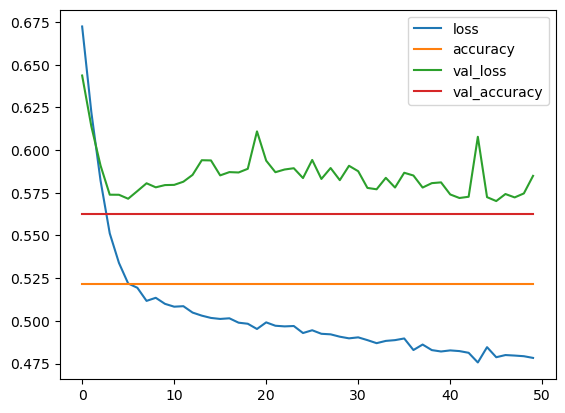

In [54]:
# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

fitted_model_history.plot()

In [55]:
# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.5562
Test Loss: 0.5176226496696472
Test Accuracy: 0.5562499761581421
